In the diverse world of trading strategies, the Nadaraya-Watson Envelope Strategy offers a different approach. Grounded in mathematical analysis, this strategy utilizes the Nadaraya-Watson kernel regression, a method traditionally employed for interpreting complex data patterns.

At the core of this strategy lies the concept of 'envelopes', which are essentially dynamic volatility bands formed around the price based on a custom Average True Range (ATR). These envelopes help provide guidance on potential market entry and exit points. The strategy suggests considering a buy when the price crosses the lower envelope and a sell when it crosses the upper envelope.

One distinctive characteristic of the Nadaraya-Watson Envelope Strategy is its use of a logarithmic scale, as opposed to a linear scale. The logarithmic scale can be advantageous when dealing with larger timeframes and assets with wide-ranging price movements.

The strategy is implemented using Pine Script v5, and includes several adjustable parameters such as the lookback window, relative weighting, and the regression start point, providing a level of flexibility.

However, it's important to maintain a balanced view. While the use of mathematical models like the Nadaraya-Watson kernel regression may provide insightful data analysis, no strategy can guarantee success. Thorough backtesting, understanding the mathematical principles involved, and sound risk management are always essential when applying any trading strategy.

The Nadaraya-Watson Envelope Strategy thus offers another tool for traders to consider. As with all strategies, its effectiveness will largely depend on the trader's understanding, application, and the specific market conditions.

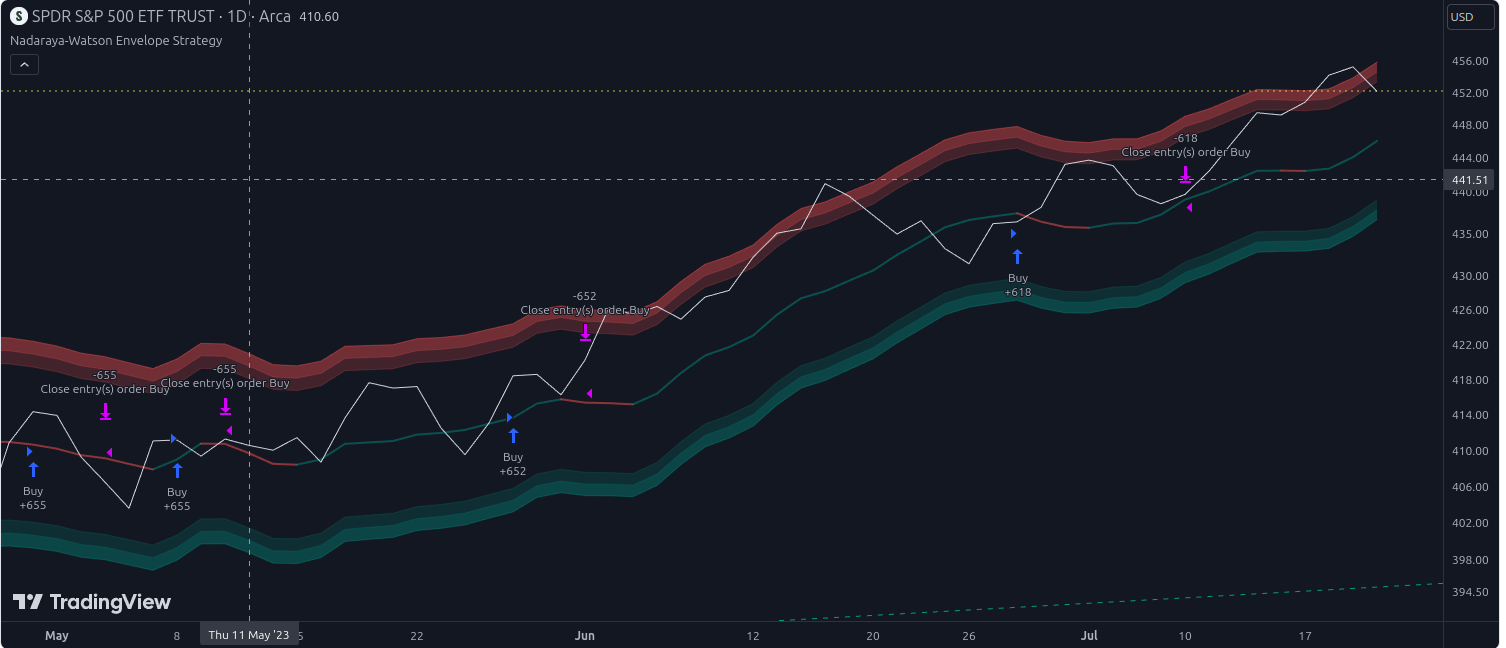

In [258]:
import pandas as pd
import numpy as np
import pandas_ta as ta
from binance.client import Client

client = Client()

# Fetch historical klines
df = client.get_historical_klines("BTCUSDT", Client.KLINE_INTERVAL_1MINUTE, "5 day ago UTC")
columns = [
    'Open time', 'Open', 'High', 'Low', 'Close', 'Volume1',
    'Close time', 'Volume', 'Adj Close',
    'Taker buy base asset volume', 'Taker buy quote asset volume', 'Ignore'
]
df = pd.DataFrame(df, columns=columns)

# Drop unnecessary columns
df = df.drop(['Close time', 'Volume1', 'Taker buy base asset volume', 'Taker buy quote asset volume', 'Ignore'], axis='columns')

# Convert columns to numeric
df['Open'] = pd.to_numeric(df['Open'], errors='coerce')
df['High'] = pd.to_numeric(df['High'], errors='coerce')
df['Low'] = pd.to_numeric(df['Low'], errors='coerce')
df['Close'] = pd.to_numeric(df['Close'], errors='coerce')
df['Volume'] = pd.to_numeric(df['Volume'], errors='coerce')
df['Adj Close'] = pd.to_numeric(df['Adj Close'], errors='coerce')

# Convert 'Open time' to datetime and set it as the index
df['Datetime'] = pd.to_datetime(df['Open time'], unit='ms')
df = df.drop(['Open time'], axis='columns')
df.set_index('Datetime', inplace=True)
df.index = df.index.tz_localize('UTC')

# Now you can safely calculate the EMA and ATR
df["EMA_slow"] = ta.ema(df['Close'], length=50)
df["EMA_fast"] = ta.ema(df['Close'], length=40)
df['ATR'] = ta.atr(df['High'], df['Low'], df['Close'], length=7)

df = df[51:]
df

,Open,High,Low,Close,Volume,Adj Close,EMA_slow,EMA_fast,ATR
Datetime,,,,,,,,,
2024-09-01 19:17:00+00:00,58531.11,58551.10,58529.80,58531.10,2.641399e+05,1438,58536.960441,58548.671539,47.991167
2024-09-01 19:18:00+00:00,58531.10,58545.22,58497.45,58497.45,8.621891e+05,1891,58535.411012,58546.172927,47.959561
2024-09-01 19:19:00+00:00,58497.45,58497.45,58449.00,58449.01,1.328400e+06,1949,58532.022737,58541.433272,48.029644
2024-09-01 19:20:00+00:00,58449.01,58451.10,58406.00,58451.10,4.856107e+05,2620,58528.849297,58537.026771,47.611022
2024-09-01 19:21:00+00:00,58451.09,58481.00,58446.00,58461.11,4.974260e+05,1446,58526.192854,58533.323514,45.809072
...,...,...,...,...,...,...,...,...,...
2024-09-06 18:22:00+00:00,53780.63,53862.00,53778.49,53847.00,8.127658e+05,2957,53910.019986,53888.862537,71.451375
2024-09-06 18:23:00+00:00,53847.01,53871.43,53781.00,53781.01,1.010200e+06,2347,53904.960771,53883.601438,74.162607
2024-09-06 18:24:00+00:00,53781.00,53785.72,53680.00,53685.67,2.388192e+06,3694,53896.361133,53873.946246,78.670806


In [259]:
df = df.reset_index()

In [260]:
df

,Datetime,Open,High,Low,Close,Volume,Adj Close,EMA_slow,EMA_fast,ATR
0,2024-09-01 19:17:00+00:00,58531.11,58551.10,58529.80,58531.10,2.641399e+05,1438,58536.960441,58548.671539,47.991167
1,2024-09-01 19:18:00+00:00,58531.10,58545.22,58497.45,58497.45,8.621891e+05,1891,58535.411012,58546.172927,47.959561
2,2024-09-01 19:19:00+00:00,58497.45,58497.45,58449.00,58449.01,1.328400e+06,1949,58532.022737,58541.433272,48.029644
3,2024-09-01 19:20:00+00:00,58449.01,58451.10,58406.00,58451.10,4.856107e+05,2620,58528.849297,58537.026771,47.611022
4,2024-09-01 19:21:00+00:00,58451.09,58481.00,58446.00,58461.11,4.974260e+05,1446,58526.192854,58533.323514,45.809072
...,...,...,...,...,...,...,...,...,...,...
7145,2024-09-06 18:22:00+00:00,53780.63,53862.00,53778.49,53847.00,8.127658e+05,2957,53910.019986,53888.862537,71.451375
7146,2024-09-06 18:23:00+00:00,53847.01,53871.43,53781.00,53781.01,1.010200e+06,2347,53904.960771,53883.601438,74.162607
7147,2024-09-06 18:24:00+00:00,53781.00,53785.72,53680.00,53685.67,2.388192e+06,3694,53896.361133,53873.946246,78.670806
7148,2024-09-06 18:25:00+00:00,53685.67,53750.80,53685.67,53749.99,1.321126e+06,2847,53890.621089,53867.899600,76.736405


In [261]:
from statsmodels.nonparametric.kernel_regression import KernelReg
import numpy as np


dfsample = df[0:]

X = dfsample.index
model = KernelReg(endog=dfsample['Close'], exog=dfsample.index, var_type='c', reg_type='lc', bw=[3])
fitted_values, marginal_effects = model.fit()

# Add fitted values to DataFrame
dfsample['NW_Fitted'] = fitted_values

# Calculate residuals
residuals = dfsample['Close'] - fitted_values

# Calculate standard deviation of residuals
std_dev = 2.*np.std(residuals)
#std_dev = dfsample['Close'].rolling(window=30).std()

# Calculate upper and lower envelopes
dfsample['Upper_Envelope'] = dfsample['NW_Fitted'] + std_dev
dfsample['Lower_Envelope'] = dfsample['NW_Fitted'] - std_dev

dfsample[0:100]

/tmp/ipykernel_10193/3501696478.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_10193/3501696478.py:22: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_10193/3501696478.py:23: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Datetime,Open,High,Low,Close,Volume,Adj Close,EMA_slow,EMA_fast,ATR,NW_Fitted,Upper_Envelope,Lower_Envelope
0,2024-09-01 19:17:00+00:00,58531.11,58551.10,58529.80,58531.10,2.641399e+05,1438,58536.960441,58548.671539,47.991167,58478.555817,58549.897674,58407.213961
1,2024-09-01 19:18:00+00:00,58531.10,58545.22,58497.45,58497.45,8.621891e+05,1891,58535.411012,58546.172927,47.959561,58472.020734,58543.362591,58400.678878
2,2024-09-01 19:19:00+00:00,58497.45,58497.45,58449.00,58449.01,1.328400e+06,1949,58532.022737,58541.433272,48.029644,58465.241551,58536.583408,58393.899695
3,2024-09-01 19:20:00+00:00,58449.01,58451.10,58406.00,58451.10,4.856107e+05,2620,58528.849297,58537.026771,47.611022,58458.472689,58529.814546,58387.130833
4,2024-09-01 19:21:00+00:00,58451.09,58481.00,58446.00,58461.11,4.974260e+05,1446,58526.192854,58533.323514,45.809072,58452.003405,58523.345262,58380.661549
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2024-09-01 20:52:00+00:00,58404.99,58405.00,58381.10,58395.78,2.790932e+05,1126,58491.774880,58487.663853,19.417732,58417.248656,58488.590513,58345.906800
96,2024-09-01 20:53:00+00:00,58395.78,58395.78,58384.00,58384.01,1.739429e+05,658,58487.548807,58482.607568,18.326627,58418.550670,58489.892526,58347.208813
97,2024-09-01 20:54:00+00:00,58384.01,58429.24,58384.01,58429.24,3.790364e+05,1169,58485.262187,58480.004272,22.169966,58420.955635,58492.297492,58349.613779
98,2024-09-01 20:55:00+00:00,58429.25,58456.00,58429.25,58446.00,3.431297e+05,1388,58483.722493,58478.345527,22.825685,58423.415402,58494.757259,58352.073546


In [262]:
my_bbands = ta.bbands(dfsample.Close, length=30, std=2)
dfsample=dfsample.join(my_bbands)
#1.105424	1.097329

In [263]:
dfsample.columns

Index(['Datetime', 'Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close',
       'EMA_slow', 'EMA_fast', 'ATR', 'NW_Fitted', 'Upper_Envelope',
       'Lower_Envelope', 'BBL_30_2.0', 'BBM_30_2.0', 'BBU_30_2.0',
       'BBB_30_2.0', 'BBP_30_2.0'],
      dtype='object')

In [264]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from datetime import datetime
dfsample = dfsample[:]
# Create a plot with 1 row
fig = make_subplots(rows=1, cols=1)

# Add candlestick plot with customized line colors
fig.add_trace(go.Candlestick(x=dfsample.index,
                             open=dfsample['Open'],
                             high=dfsample['High'],
                             low=dfsample['Low'],
                             close=dfsample['Close'],
                             increasing=dict(line=dict(color='rgba(0, 255, 0, 0.6)', width=0.1), # Red with transparency for increasing
                                             fillcolor='rgba(0, 255, 0, 0.6)'),  # Match fill color with line color
                             decreasing=dict(line=dict(color='rgba(255, 0, 0, 0.6)', width=0.1), # Green with transparency for decreasing
                                             fillcolor='rgba(255, 0, 0, 0.6)')), # Match fill color with line color
              row=1, col=1)

# Add Nadaraya-Watson fitted line
fig.add_trace(go.Scatter(x=dfsample.index, y=dfsample['NW_Fitted'],
                         line=dict(color='green', width=2),
                         name="Nadaraya-Watson Fit"),
              row=1, col=1)

# Add upper standard deviation envelope
fig.add_trace(go.Scatter(x=dfsample.index, y=dfsample['Upper_Envelope'],
                         line=dict(color='rgba(0,0,255,0.2)'), # Light blue color
                         name='Upper Envelope',
                         showlegend=False),
              row=1, col=1)

# Add lower standard deviation envelope
fig.add_trace(go.Scatter(x=dfsample.index, y=dfsample['Lower_Envelope'],
                         line=dict(color='rgba(0,0,255,0.2)'), # Light blue color
                         name='Lower Envelope',
                         fill='tonexty', # This fills the area between this trace and the next trace
                         fillcolor='rgba(0,0,255,0.3)', # More opaque blue fill
                         showlegend=False),
              row=1, col=1)


# Add Bollinger Bands
# fig.add_trace(go.Scatter(x=dfsample.index, y=dfsample['BBU_30_2.0'],
#                          line=dict(color='rgba(0, 0, 255, 0.4)'),  # Upper Band
#                          name='Upper Bollinger Band',
#                          showlegend=True),
#               row=1, col=1)

# fig.add_trace(go.Scatter(x=dfsample.index, y=dfsample['BBM_30_2.0'],
#                          line=dict(color='rgba(0, 0, 255, 0.6)'),  # Middle Band
#                          name='Middle Bollinger Band',
#                          showlegend=True),
#               row=1, col=1)

# fig.add_trace(go.Scatter(x=dfsample.index, y=dfsample['BBL_30_2.0'],
#                          line=dict(color='rgba(0, 0, 255, 0.4)'),  # Lower Band
#                          name='Lower Bollinger Band',
#                          fill='tonexty',  # Fill between this line and the next upper band line
#                          fillcolor='rgba(0, 0, 255, 0.1)',  # Light blue fill between the bands
#                          showlegend=True),
#               row=1, col=1)


# Update layout to set background color to black and remove gridlines
fig.update_layout(
    width=1000,
    height=600,
    sliders=[],
    paper_bgcolor='black',  # Set the background color of the entire figure
    plot_bgcolor='black',   # Set the background color of the plotting area
    xaxis_showgrid=False,   # Remove x-axis gridlines
    yaxis_showgrid=False,   # Remove y-axis gridlines
)

fig.show(renderer="browser")


In [265]:
def ema_signal(df, backcandles):
    # Create boolean Series for conditions
    above = df['EMA_fast'] > df['EMA_slow']
    below = df['EMA_fast'] < df['EMA_slow']

    # Rolling window to check if condition is met consistently over the window
    above_all = above.rolling(window=backcandles).apply(lambda x: x.all(), raw=True).fillna(0).astype(bool)
    below_all = below.rolling(window=backcandles).apply(lambda x: x.all(), raw=True).fillna(0).astype(bool)

    # Assign signals based on conditions
    df['EMASignal'] = 0  # Default no signal
    df.loc[above_all, 'EMASignal'] = 2  # Signal 2 where EMA_fast consistently above EMA_slow
    df.loc[below_all, 'EMASignal'] = 1  # Signal 1 where EMA_fast consistently below EMA_slow

    return df

df = df[-60000:]
df.reset_index(inplace=True, drop=True)
df = ema_signal(dfsample,  7)

In [266]:
df

,Datetime,Open,High,Low,Close,Volume,Adj Close,EMA_slow,EMA_fast,ATR,NW_Fitted,Upper_Envelope,Lower_Envelope,BBL_30_2.0,BBM_30_2.0,BBU_30_2.0,BBB_30_2.0,BBP_30_2.0,EMASignal
0,2024-09-01 19:17:00+00:00,58531.11,58551.10,58529.80,58531.10,2.641399e+05,1438,58536.960441,58548.671539,47.991167,58478.555817,58549.897674,58407.213961,NaN,NaN,NaN,NaN,NaN,0
1,2024-09-01 19:18:00+00:00,58531.10,58545.22,58497.45,58497.45,8.621891e+05,1891,58535.411012,58546.172927,47.959561,58472.020734,58543.362591,58400.678878,NaN,NaN,NaN,NaN,NaN,0
2,2024-09-01 19:19:00+00:00,58497.45,58497.45,58449.00,58449.01,1.328400e+06,1949,58532.022737,58541.433272,48.029644,58465.241551,58536.583408,58393.899695,NaN,NaN,NaN,NaN,NaN,0
3,2024-09-01 19:20:00+00:00,58449.01,58451.10,58406.00,58451.10,4.856107e+05,2620,58528.849297,58537.026771,47.611022,58458.472689,58529.814546,58387.130833,NaN,NaN,NaN,NaN,NaN,0
4,2024-09-01 19:21:00+00:00,58451.09,58481.00,58446.00,58461.11,4.974260e+05,1446,58526.192854,58533.323514,45.809072,58452.003405,58523.345262,58380.661549,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7145,2024-09-06 18:22:00+00:00,53780.63,53862.00,53778.49,53847.00,8.127658e+05,2957,53910.019986,53888.862537,71.451375,53792.770675,53864.112531,53721.428819,53716.296325,53869.201333,54022.106341,0.567690,0.427402,1
7146,2024-09-06 18:23:00+00:00,53847.01,53871.43,53781.00,53781.01,1.010200e+06,2347,53904.960771,53883.601438,74.162607,53782.378057,53853.719913,53711.036200,53710.683482,53866.768333,54022.853185,0.579522,0.225283,1
7147,2024-09-06 18:24:00+00:00,53781.00,53785.72,53680.00,53685.67,2.388192e+06,3694,53896.361133,53873.946246,78.670806,53772.927140,53844.268996,53701.585284,53691.966445,53858.091000,54024.215555,0.616897,-0.018951,1
7148,2024-09-06 18:25:00+00:00,53685.67,53750.80,53685.67,53749.99,1.321126e+06,2847,53890.621089,53867.899600,76.736405,53764.864544,53836.206400,53693.522687,53693.956894,53848.024000,54002.091106,0.572229,0.181846,1


In [267]:
def total_signal(df):
    # Vectorized conditions for total_signal
    condition_buy = (df['EMASignal'] == 2) & (df['Close'] <= df['Lower_Envelope'])
    condition_sell = (df['EMASignal'] == 1) & (df['Close'] >= df['Upper_Envelope'])

    # Assigning signals based on conditions
    df['Total_Signal'] = 0  # Default no signal
    df.loc[condition_buy, 'Total_Signal'] = 2
    df.loc[condition_sell, 'Total_Signal'] = 1

total_signal(dfsample)


In [268]:
dfsample["TotalSignal"]=dfsample.Total_Signal
dfsample.TotalSignal.value_counts()

TotalSignal
0    7017
1      94
2      39
Name: count, dtype: int64

In [269]:
dfsample[dfsample['TotalSignal']==2]

,Datetime,Open,High,Low,Close,Volume,Adj Close,EMA_slow,EMA_fast,ATR,...,Upper_Envelope,Lower_Envelope,BBL_30_2.0,BBM_30_2.0,BBU_30_2.0,BBB_30_2.0,BBP_30_2.0,EMASignal,Total_Signal,TotalSignal
367,2024-09-02 01:24:00+00:00,57453.00,57453.01,57321.10,57372.01,2.334774e+06,3074,57421.192749,57425.203897,69.397355,...,57515.935803,57373.252090,57278.196474,57420.476333,57562.756193,0.495572,0.329680,2,2,2
368,2024-09-02 01:25:00+00:00,57372.00,57393.06,57350.13,57350.14,4.896261e+05,1987,57418.406367,57421.542244,65.616305,...,57508.355741,57365.672028,57287.373166,57422.747333,57558.121501,0.471500,0.231827,2,2,2
505,2024-09-02 03:42:00+00:00,57578.00,57580.00,57512.01,57517.68,2.562051e+06,3103,57608.261570,57618.336342,56.654922,...,57660.892066,57518.208353,57556.906208,57649.384333,57741.862459,0.320830,-0.212084,2,2,2
809,2024-09-02 08:46:00+00:00,58154.00,58154.00,58054.00,58054.01,1.411794e+06,2369,57964.971969,58010.099789,63.363149,...,58211.863521,58069.179808,57871.215928,58098.344000,58325.472072,0.781875,0.402403,2,2,2
828,2024-09-02 09:05:00+00:00,58032.00,58032.01,57984.00,57984.01,1.006322e+06,1192,58036.958713,58063.802494,40.126756,...,58147.137960,58004.454248,58012.240109,58127.043333,58241.846557,0.395008,-0.122950,2,2,2
1184,2024-09-02 15:01:00+00:00,58565.00,58565.01,58480.90,58495.46,3.212329e+06,3829,58531.891505,58558.923350,59.527896,...,58658.282167,58515.598454,58523.223980,58652.993667,58782.763353,0.442500,-0.106974,2,2,2
1532,2024-09-02 20:49:00+00:00,58618.00,58621.00,58617.99,58620.99,1.117247e+05,212,58552.212464,58562.822195,19.605060,...,58786.187816,58643.504103,58504.900956,58575.235333,58645.569711,0.240151,0.825265,2,2,2
1534,2024-09-02 20:51:00+00:00,58713.98,58727.69,58698.01,58727.69,1.162517e+06,1773,58565.188983,58577.878393,30.031472,...,58885.615357,58742.931644,58485.731551,58586.014000,58686.296449,0.342343,1.206385,2,2,2
1539,2024-09-02 20:56:00+00:00,59127.00,59170.99,58944.00,58944.00,4.668994e+06,6968,58647.984854,58676.165243,119.405209,...,59086.939703,58944.255990,58324.643293,58663.983000,59003.322707,1.156893,0.912591,2,2,2
1542,2024-09-02 20:59:00+00:00,58993.00,59033.99,58981.18,58992.00,2.804725e+06,4114,58687.833504,58721.316842,102.102668,...,59148.558594,59005.874881,58331.195556,58711.116000,59091.036444,1.294203,0.869662,2,2,2


In [270]:
df[828:840]

,Datetime,Open,High,Low,Close,Volume,Adj Close,EMA_slow,EMA_fast,ATR,...,Upper_Envelope,Lower_Envelope,BBL_30_2.0,BBM_30_2.0,BBU_30_2.0,BBB_30_2.0,BBP_30_2.0,EMASignal,Total_Signal,TotalSignal
828,2024-09-02 09:05:00+00:00,58032.00,58032.01,57984.00,57984.01,1.006322e+06,1192,58036.958713,58063.802494,40.126756,...,58147.137960,58004.454248,58012.240109,58127.043333,58241.846557,0.395008,-0.122950,2,2,2
829,2024-09-02 09:06:00+00:00,57984.01,58121.00,57984.01,58120.99,1.571395e+06,2228,58040.254058,58066.592129,53.964363,...,58151.475263,58008.791550,58012.019065,58125.016000,58238.012935,0.388807,0.482185,2,0,0
830,2024-09-02 09:07:00+00:00,58121.00,58131.99,58102.00,58126.00,1.158017e+06,1681,58043.616644,58069.490074,50.539454,...,58155.158413,58012.474700,58011.618203,58124.342333,58237.066464,0.387872,0.507353,2,0,0
831,2024-09-02 09:08:00+00:00,58127.00,58141.10,58118.00,58120.00,1.432694e+06,1255,58046.612069,58071.953973,46.619532,...,58156.191386,58013.507674,58011.158974,58123.808667,58236.458360,0.387620,0.483095,2,0,0
832,2024-09-02 09:09:00+00:00,58120.00,58130.15,58075.00,58130.15,9.139617e+05,1822,58049.888067,58074.792803,47.838170,...,58153.182854,58010.499141,58011.523374,58124.180667,58236.837959,0.387643,0.526493,2,0,0
833,2024-09-02 09:10:00+00:00,58130.14,58130.15,58103.00,58106.02,3.880574e+05,777,58052.089319,58076.316081,44.882717,...,58145.826287,58003.142574,58012.751356,58120.617667,58228.483977,0.371181,0.432334,2,0,0
834,2024-09-02 09:11:00+00:00,58106.03,58108.00,58040.00,58040.00,1.428935e+06,1447,58051.615228,58074.544565,48.185186,...,58134.872828,57992.189115,58009.954916,58114.484667,58219.014417,0.359737,0.143715,2,0,0
835,2024-09-02 09:12:00+00:00,58040.01,58065.19,58036.00,58062.00,9.564652e+05,1148,58052.022474,58073.932635,45.471588,...,58121.681999,57978.998286,58006.470744,58111.202333,58215.933923,0.360452,0.265103,2,0,0
836,2024-09-02 09:13:00+00:00,58062.00,58062.00,58010.00,58013.99,1.083469e+06,1501,58050.531004,58071.008604,46.404218,...,58107.640443,57964.956730,57998.794161,58105.535333,58212.276506,0.367404,0.071181,2,0,0
837,2024-09-02 09:14:00+00:00,58013.99,58044.11,58003.00,58003.01,1.785006e+06,1849,58048.667436,58067.691599,45.647901,...,58093.742415,57951.058702,57989.058296,58100.722333,58212.386370,0.384381,0.062472,2,0,0


In [271]:
import numpy as np
def pointpos(x):
    if x['TotalSignal']==2:
        return x['Low']-1e-4
    elif x['TotalSignal']==1:
        return x['High']+1e-4
    else:
        return np.nan

df['pointpos'] = df.apply(lambda row: pointpos(row), axis=1)

In [272]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from datetime import datetime
st=0
dfpl = df[st:st+350]
# Create a plot with 2 rows
fig = make_subplots(rows=3, cols=1)

# Add candlestick plot on the first row
fig.add_trace(go.Candlestick(x=dfpl.index,
                             open=dfpl['Open'],
                             high=dfpl['High'],
                             low=dfpl['Low'],
                             close=dfpl['Close']),
              row=1, col=1)

# Add Bollinger Bands, EMA lines on the same subplot
fig.add_trace(go.Scatter(x=dfpl.index, y=dfpl['BBL_30_2.0'],
                         line=dict(color='green', width=1),
                         name="BBL"),
              row=1, col=1)
fig.add_trace(go.Scatter(x=dfpl.index, y=dfpl['BBU_30_2.0'],
                         line=dict(color='green', width=1),
                         name="BBU"),
              row=1, col=1)
fig.add_trace(go.Scatter(x=dfpl.index, y=dfpl['EMA_fast'],
                         line=dict(color='black', width=1),
                         name="EMA_fast"),
              row=1, col=1)
fig.add_trace(go.Scatter(x=dfpl.index, y=dfpl['EMA_slow'],
                         line=dict(color='blue', width=1),
                         name="EMA_slow"),
              row=1, col=1)

# Add markers for trade entry points on the same subplot
fig.add_trace(go.Scatter(x=dfpl.index, y=dfpl['pointpos'], mode="markers",
                         marker=dict(size=8, color="MediumPurple"),
                         name="entry"),
              row=1, col=1)

fig.update_layout(width=1200, height=800, sliders=[])
fig.show(renderer="browser")

In [273]:
dfsample

,Datetime,Open,High,Low,Close,Volume,Adj Close,EMA_slow,EMA_fast,ATR,...,Lower_Envelope,BBL_30_2.0,BBM_30_2.0,BBU_30_2.0,BBB_30_2.0,BBP_30_2.0,EMASignal,Total_Signal,TotalSignal,pointpos
0,2024-09-01 19:17:00+00:00,58531.11,58551.10,58529.80,58531.10,2.641399e+05,1438,58536.960441,58548.671539,47.991167,...,58407.213961,NaN,NaN,NaN,NaN,NaN,0,0,0,NaN
1,2024-09-01 19:18:00+00:00,58531.10,58545.22,58497.45,58497.45,8.621891e+05,1891,58535.411012,58546.172927,47.959561,...,58400.678878,NaN,NaN,NaN,NaN,NaN,0,0,0,NaN
2,2024-09-01 19:19:00+00:00,58497.45,58497.45,58449.00,58449.01,1.328400e+06,1949,58532.022737,58541.433272,48.029644,...,58393.899695,NaN,NaN,NaN,NaN,NaN,0,0,0,NaN
3,2024-09-01 19:20:00+00:00,58449.01,58451.10,58406.00,58451.10,4.856107e+05,2620,58528.849297,58537.026771,47.611022,...,58387.130833,NaN,NaN,NaN,NaN,NaN,0,0,0,NaN
4,2024-09-01 19:21:00+00:00,58451.09,58481.00,58446.00,58461.11,4.974260e+05,1446,58526.192854,58533.323514,45.809072,...,58380.661549,NaN,NaN,NaN,NaN,NaN,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7145,2024-09-06 18:22:00+00:00,53780.63,53862.00,53778.49,53847.00,8.127658e+05,2957,53910.019986,53888.862537,71.451375,...,53721.428819,53716.296325,53869.201333,54022.106341,0.567690,0.427402,1,0,0,NaN
7146,2024-09-06 18:23:00+00:00,53847.01,53871.43,53781.00,53781.01,1.010200e+06,2347,53904.960771,53883.601438,74.162607,...,53711.036200,53710.683482,53866.768333,54022.853185,0.579522,0.225283,1,0,0,NaN
7147,2024-09-06 18:24:00+00:00,53781.00,53785.72,53680.00,53685.67,2.388192e+06,3694,53896.361133,53873.946246,78.670806,...,53701.585284,53691.966445,53858.091000,54024.215555,0.616897,-0.018951,1,0,0,NaN
7148,2024-09-06 18:25:00+00:00,53685.67,53750.80,53685.67,53749.99,1.321126e+06,2847,53890.621089,53867.899600,76.736405,...,53693.522687,53693.956894,53848.024000,54002.091106,0.572229,0.181846,1,0,0,NaN


In [274]:
dfsample[dfsample['TotalSignal']==2]

,Datetime,Open,High,Low,Close,Volume,Adj Close,EMA_slow,EMA_fast,ATR,...,Lower_Envelope,BBL_30_2.0,BBM_30_2.0,BBU_30_2.0,BBB_30_2.0,BBP_30_2.0,EMASignal,Total_Signal,TotalSignal,pointpos
367,2024-09-02 01:24:00+00:00,57453.00,57453.01,57321.10,57372.01,2.334774e+06,3074,57421.192749,57425.203897,69.397355,...,57373.252090,57278.196474,57420.476333,57562.756193,0.495572,0.329680,2,2,2,57321.0999
368,2024-09-02 01:25:00+00:00,57372.00,57393.06,57350.13,57350.14,4.896261e+05,1987,57418.406367,57421.542244,65.616305,...,57365.672028,57287.373166,57422.747333,57558.121501,0.471500,0.231827,2,2,2,57350.1299
505,2024-09-02 03:42:00+00:00,57578.00,57580.00,57512.01,57517.68,2.562051e+06,3103,57608.261570,57618.336342,56.654922,...,57518.208353,57556.906208,57649.384333,57741.862459,0.320830,-0.212084,2,2,2,57512.0099
809,2024-09-02 08:46:00+00:00,58154.00,58154.00,58054.00,58054.01,1.411794e+06,2369,57964.971969,58010.099789,63.363149,...,58069.179808,57871.215928,58098.344000,58325.472072,0.781875,0.402403,2,2,2,58053.9999
828,2024-09-02 09:05:00+00:00,58032.00,58032.01,57984.00,57984.01,1.006322e+06,1192,58036.958713,58063.802494,40.126756,...,58004.454248,58012.240109,58127.043333,58241.846557,0.395008,-0.122950,2,2,2,57983.9999
1184,2024-09-02 15:01:00+00:00,58565.00,58565.01,58480.90,58495.46,3.212329e+06,3829,58531.891505,58558.923350,59.527896,...,58515.598454,58523.223980,58652.993667,58782.763353,0.442500,-0.106974,2,2,2,58480.8999
1532,2024-09-02 20:49:00+00:00,58618.00,58621.00,58617.99,58620.99,1.117247e+05,212,58552.212464,58562.822195,19.605060,...,58643.504103,58504.900956,58575.235333,58645.569711,0.240151,0.825265,2,2,2,58617.9899
1534,2024-09-02 20:51:00+00:00,58713.98,58727.69,58698.01,58727.69,1.162517e+06,1773,58565.188983,58577.878393,30.031472,...,58742.931644,58485.731551,58586.014000,58686.296449,0.342343,1.206385,2,2,2,58698.0099
1539,2024-09-02 20:56:00+00:00,59127.00,59170.99,58944.00,58944.00,4.668994e+06,6968,58647.984854,58676.165243,119.405209,...,58944.255990,58324.643293,58663.983000,59003.322707,1.156893,0.912591,2,2,2,58943.9999
1542,2024-09-02 20:59:00+00:00,58993.00,59033.99,58981.18,58992.00,2.804725e+06,4114,58687.833504,58721.316842,102.102668,...,59005.874881,58331.195556,58711.116000,59091.036444,1.294203,0.869662,2,2,2,58981.1799


In [275]:
# Initialize counters
correct_signals = 0
wrong_signals = 0
total_signals = 0  # To keep track of total valid signals (1 and 2)

# Iterate through the DataFrame
for i in range(len(df) - 1):  # Iterate until the second-last row
    current_price = df['Close'].iloc[i]
    next_price = df['Close'].iloc[i + 1]  # Price of the next candle
    signal = df['TotalSignal'].iloc[i]
    
    if signal == 1:  # Signal indicates the price will go down
        total_signals += 1
        if next_price < current_price:
            correct_signals += 1
        else:
            wrong_signals += 1
    elif signal == 2:  # Signal indicates the price will go up
        total_signals += 1
        if next_price > current_price:
            correct_signals += 1
        else:
            wrong_signals += 1

# Print results
print(f'Correct signals: {correct_signals}')
print(f'Wrong signals: {wrong_signals}')
print(f'Accuracy: {(correct_signals / total_signals) * 100:.2f}%')


Correct signals: 117
Wrong signals: 16
Accuracy: 87.97%


In [276]:
import pandas as pd

# Sample DataFrame (use df as the dataframe with 'TotalSignal', 'Close', and 'Datetime' columns)
df = dfsample.copy()

# Initialize variables
initial_cash = 10000  # starting cash
cash = initial_cash
position = None  # track current position ('long' or 'short')
entry_price = 0
profits = []  # store individual trade profits
trade_log = []  # store trade details

# Trading parameters
profit_target_pct = 0.000  # 0.6% profit on investment

# Iterate through the DataFrame
for i in range(len(df) - 1):
    signal = df['TotalSignal'].iloc[i]
    current_price = df['Close'].iloc[i]
    current_time = df['Datetime'].iloc[i]
    
    # Skip trading if signal is 0 (uncertainty)
    if signal == 0:
        continue
    
    # No open position
    if position is None:
        if signal == 1:  # Bearish signal -> Go short
            position = 'short'
            entry_price = current_price
            entry_time = current_time
            trade_log.append(f'Enter Short at {entry_price} on {entry_time}')
        elif signal == 2:  # Bullish signal -> Go long
            position = 'long'
            entry_price = current_price
            entry_time = current_time
            trade_log.append(f'Enter Long at {entry_price} on {entry_time}')
    
    else:  # Open position (long or short)
        next_price = df['Close'].iloc[i + 1]
        next_time = df['Datetime'].iloc[i + 1]
        
        # For short position, we want the price to decrease
        if position == 'short':
            profit_target = entry_price * (1 - profit_target_pct)
            if next_price <= profit_target or signal == 2:  # 0.6% profit or signal change
                profit = (entry_price - next_price) / entry_price * cash  # Profit from short
                cash += profit  # Update cash
                profits.append(profit)
                trade_log.append(f'Exit Short at {next_price} on {next_time}, Profit: {profit:.2f}')
                position = None  # Close the position

        # For long position, we want the price to increase
        elif position == 'long':
            profit_target = entry_price * (1 + profit_target_pct)
            if next_price >= profit_target or signal == 1:  # 0.6% profit or signal change
                profit = (next_price - entry_price) / entry_price * cash  # Profit from long
                cash += profit  # Update cash
                profits.append(profit)
                trade_log.append(f'Exit Long at {next_price} on {next_time}, Profit: {profit:.2f}')
                position = None  # Close the position

# Backtest report
total_profit = cash - initial_cash
total_profit_pct = (total_profit / initial_cash) * 100
winning_trades = len([p for p in profits if p > 0])
losing_trades = len([p for p in profits if p < 0])
win_rate = winning_trades / (winning_trades + losing_trades) * 100 if (winning_trades + losing_trades) > 0 else 0

# Print the backtest report
print(f'Total profit: {total_profit:.2f} ({total_profit_pct:.2f}%)')
print(f'Winning trades: {winning_trades}')
print(f'Losing trades: {losing_trades}')
print(f'Win rate: {win_rate:.2f}%')

# Print the trade log with timestamps
for log in trade_log:
    print(log)


Total profit: 1811.92 (18.12%)
Winning trades: 52
Losing trades: 5
Win rate: 91.23%
Enter Short at 58414.0 on 2024-09-01 22:00:00+00:00
Exit Short at 57745.0 on 2024-09-01 22:21:00+00:00, Profit: 114.53
Enter Short at 57752.99 on 2024-09-01 22:23:00+00:00
Exit Short at 57677.01 on 2024-09-01 22:52:00+00:00, Profit: 13.31
Enter Short at 57572.01 on 2024-09-01 22:57:00+00:00
Exit Short at 57403.0 on 2024-09-01 23:07:00+00:00, Profit: 29.73
Enter Short at 57534.02 on 2024-09-01 23:09:00+00:00
Exit Short at 57431.11 on 2024-09-01 23:37:00+00:00, Profit: 18.17
Enter Short at 57503.01 on 2024-09-02 00:16:00+00:00
Exit Short at 57435.99 on 2024-09-02 01:01:00+00:00, Profit: 11.86
Enter Long at 57372.01 on 2024-09-02 01:24:00+00:00
Exit Long at 57386.95 on 2024-09-02 01:26:00+00:00, Profit: 2.65
Enter Long at 57517.68 on 2024-09-02 03:42:00+00:00
Exit Long at 58077.93 on 2024-09-02 08:47:00+00:00, Profit: 99.26
Enter Long at 57984.01 on 2024-09-02 09:05:00+00:00
Exit Long at 58606.0 on 2024-09